Test an approach by Yannick by using the darts package:
(https://unit8co.github.io/darts/generated_api/darts.models.forecasting.random_forest.html#)

Important notice: the aim to to use historical values of our indices to predict future returns. based on these returns we try to construct portfolios and compare the results with classic approaches such as EW or HA.

This notebook aims to perform all models only to the benchmark index for now!

In [339]:
import pandas as pd
import numpy as np
import darts
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn

In [340]:
ts = darts.TimeSeries.from_csv('data/price_data_filtered.csv', parse_dates=True, index_col=0)
ts = ts.astype('float32')

In [341]:
ts_stoxx = ts['STOXX Europe 600']
#ts['STOXX Europe 600'].plot()

In [342]:
train, test = ts_stoxx.split_after(pd.Timestamp('2015-01-01'))

In [343]:
#train.plot(label="training")
#test.plot(label="testing")

### Shrinkage methods:
- Linear Regression
- Ridge Regression
- Lasso Regression
- Elastic Net
- Bridge Regression

We can use the Linear Regression model offered by darts and the (general) Regression model for all other shrinkage methods, where we need to define the specific sklearn model within the "model" parameter.

In [344]:
from darts.models import LinearRegressionModel
from darts.models import RegressionModel

In [345]:
# linear regression model
linear_regresseion = LinearRegressionModel(lags=1, output_chunk_length=1)
linear_regresseion.fit(train)
linear_forecast = linear_regression.predict(len(test))

In [346]:
# ridge regression model
ridge_regression = RegressionModel(lags=1, output_chunk_length=1, model=sklearn.linear_model.Ridge(alpha=1))
ridge_regression.fit(train)
ridge_forecast = ridge_regression.predict(len(test))

In [347]:
# lasso regression model
lasso_regression = RegressionModel(lags=1, output_chunk_length=1, model=sklearn.linear_model.Lasso(alpha=1))
lasso_regression.fit(train)
lasso_forecast = lasso_regression.predict(len(test))

In [348]:
# elastic net regression model
elastic_net_regression = RegressionModel(lags=1, output_chunk_length=1, model=sklearn.linear_model.ElasticNet(alpha=1))
elastic_net_regression.fit(train)
elastic_net_forecast = elastic_net_regression.predict(len(test))

In [349]:
# bridge regression model
bridge_regression = RegressionModel(lags=1, output_chunk_length=1, model=sklearn.linear_model.LassoLarsCV(cv=3))
bridge_regression.fit(train)
bridge_forecast = bridge_regression.predict(len(test))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

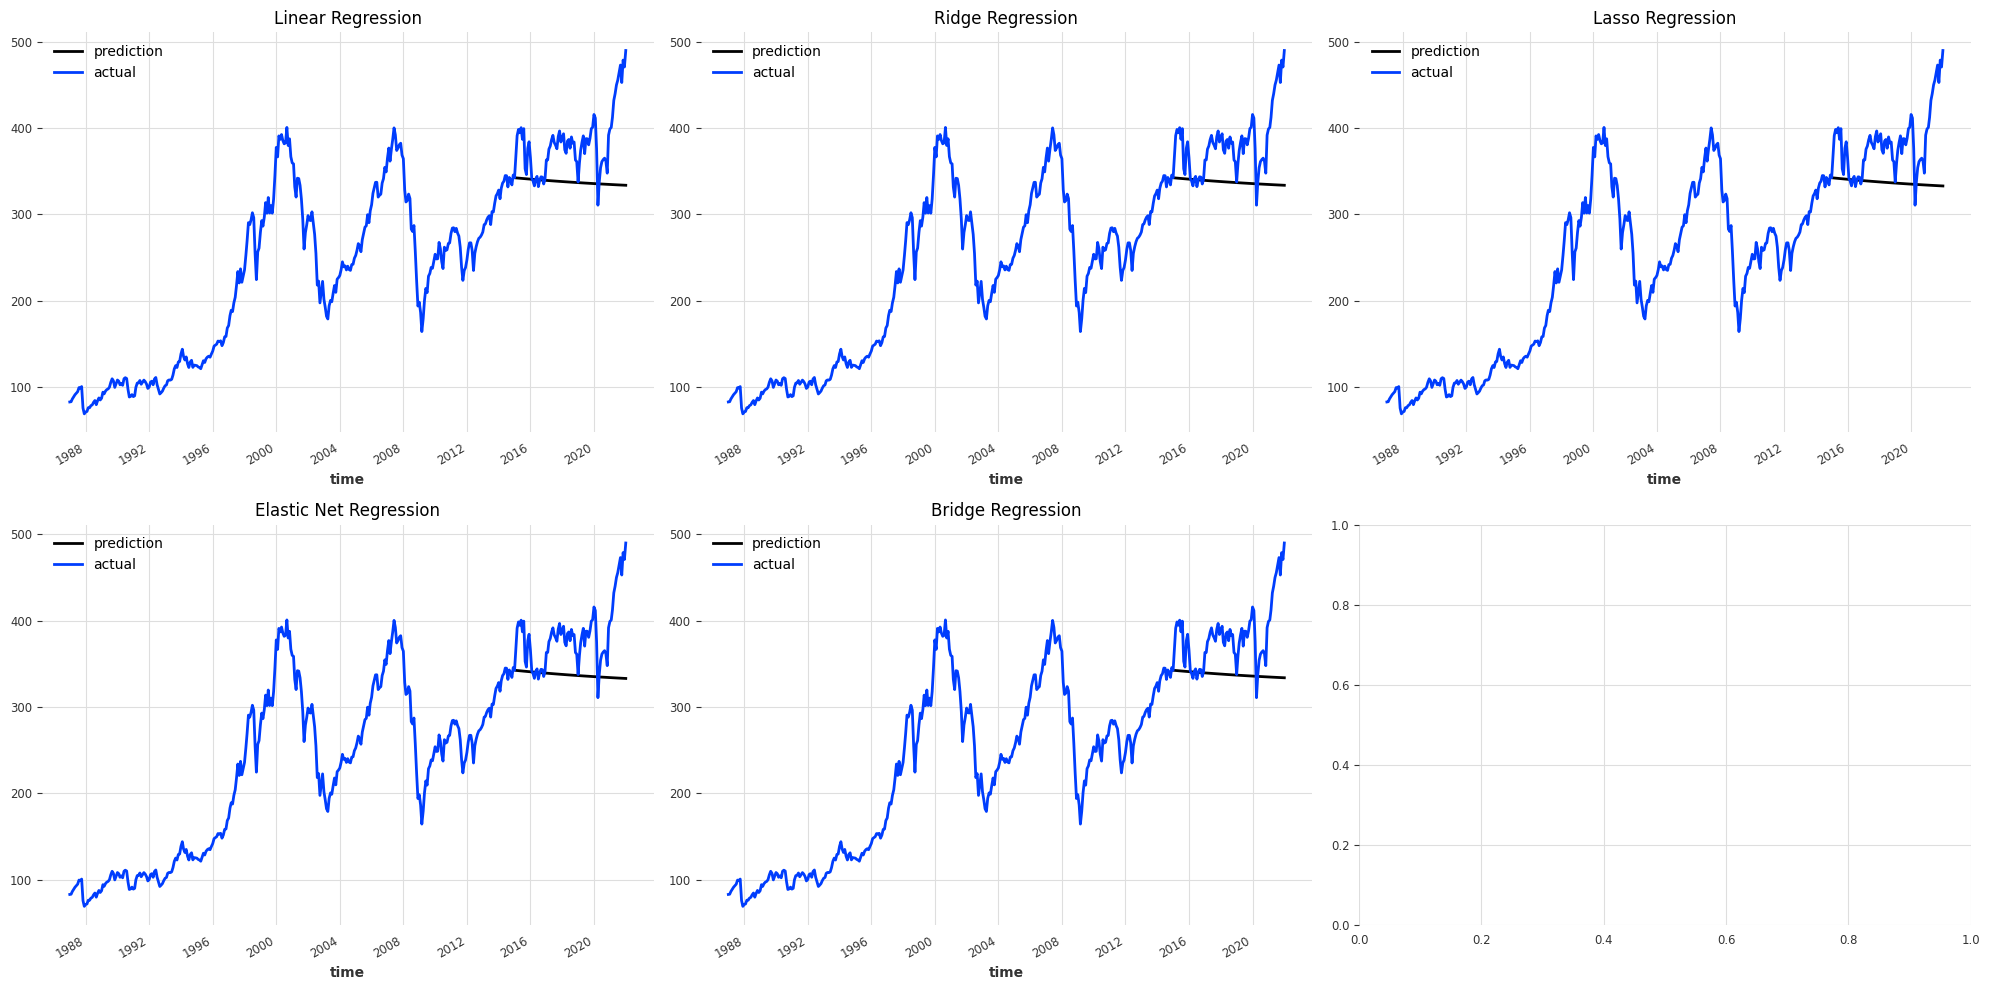

In [350]:
# Plot the predictions
shrinkage_forecasts = {'Linear Regression': linear_forecast,
                       'Ridge Regression': ridge_forecast,
                       'Lasso Regression': lasso_forecast,
                       'Elastic Net Regression': elastic_net_forecast,
                       'Bridge Regression': bridge_forecast}

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax = ax.flatten()

for i, (name, forecast) in enumerate(shrinkage_forecasts.items()):
    forecast.plot(label='prediction', ax=ax[i])
    ts_stoxx.plot(label='actual', ax=ax[i])
    ax[i].legend()
    ax[i].set_title(name)

plt.tight_layout();

### Dimensionality reduction methods

- PLS regression
- PLS Canonical
- CCA

We can use the (general) Regression model for all other shrinkage methods, where we need to define the specific sklearn model within the "model" parameter.

In [351]:
from sklearn import cross_decomposition

In [352]:
pls_regression = RegressionModel(lags=1, output_chunk_length=1, model= sklearn.cross_decomposition.PLSRegression(n_components=1))
pls_regression.fit(train)
pls_forecast = pls_regression.predict(len(test))

In [353]:
pls_canonical = RegressionModel(lags=1, output_chunk_length=1, model= sklearn.cross_decomposition.PLSCanonical(n_components=1))
pls_canonical.fit(train)
pls_canonical_forecast = pls_canonical.predict(len(test))

In [354]:
cca = RegressionModel(lags=1, output_chunk_length=1, model= sklearn.cross_decomposition.CCA(n_components=1))
cca.fit(train)
cca_forecast = cca.predict(len(test))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


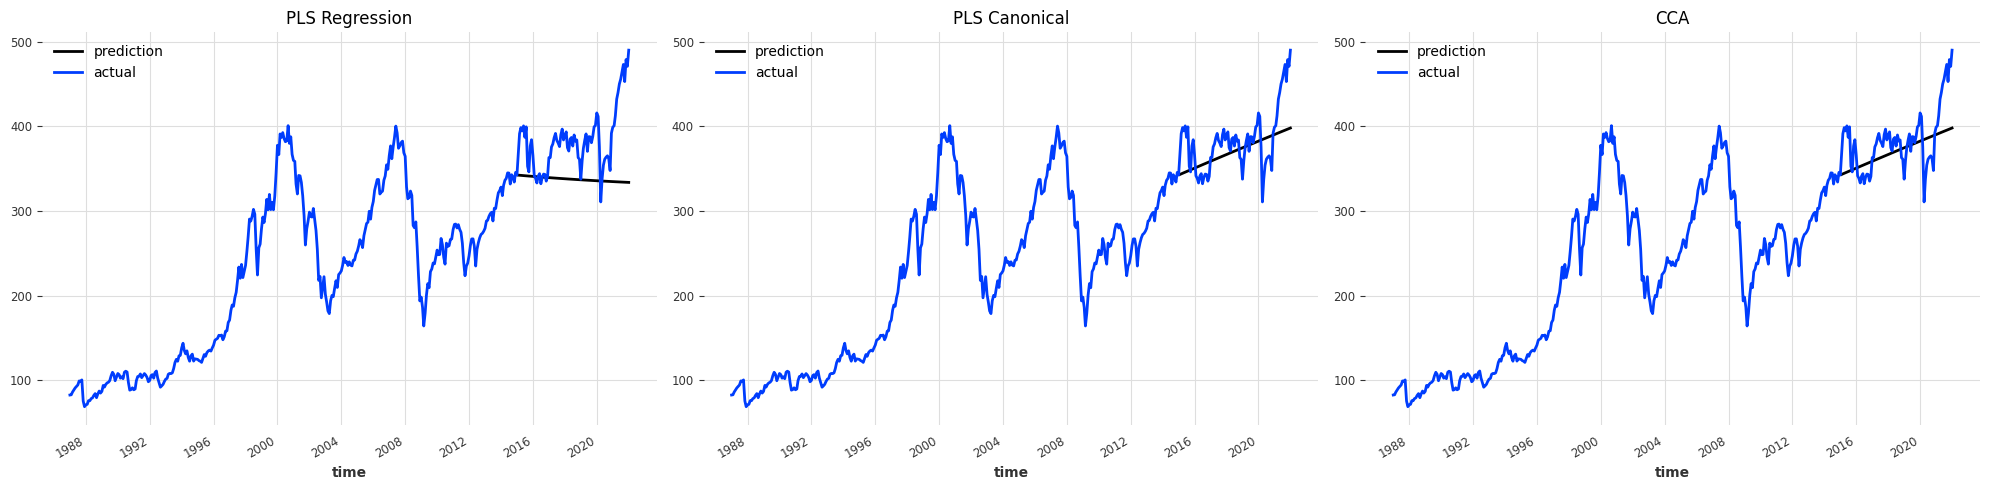

In [355]:
# Plot the predictions
dimensionality_forecasts = {'PLS Regression': pls_forecast,
                            'PLS Canonical': pls_canonical_forecast,
                            'CCA': cca_forecast}

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax = ax.flatten()

for i, (name, forecast) in enumerate(dimensionality_forecasts.items()):
    forecast.plot(label='prediction', ax=ax[i])
    ts_stoxx.plot(label='actual', ax=ax[i])
    ax[i].legend()
    ax[i].set_title(name)

plt.tight_layout();

### Non-linear ML methods

- Random Forest Regressor
- Gradient Boosting Regressor
- Ada Boost Regressor 
- ExtraTreesRegressor
- Support Vector Machine Regressor

In [356]:
from darts.models import RandomForest
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR

In [357]:
# random forest model
random_forest = RandomForest(lags=100, output_chunk_length=1, n_estimators=100)
random_forest.fit(train)
random_forest_forecast = random_forest.predict(len(test))

In [358]:
# gradient boosting model
gb_boosting = RegressionModel(lags=100, output_chunk_length=1, 
                              model=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0))
gb_boosting.fit(train)
gb_boosting_forecast = gb_boosting.predict(len(test))

In [359]:
# ada boosting model
ada_boosting = RegressionModel(lags=1, output_chunk_length=1,
                                 model=sklearn.ensemble.AdaBoostRegressor(n_estimators=1000000, random_state=0))
ada_boosting.fit(train)
ada_boosting_forecast = ada_boosting.predict(len(test))

In [360]:
# extra tree regression model
extra_tree = RegressionModel(lags=1, output_chunk_length=1,
                                    model=sklearn.ensemble.ExtraTreesRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0))
extra_tree.fit(train)
extra_tree_forecast = extra_tree.predict(len(test))

In [361]:
# support vector regression model
svr = RegressionModel(lags=1, output_chunk_length=1,
                                model=sklearn.svm.SVR(kernel='rbf', C=1e3, gamma=0.1))
svr.fit(train)
svr_forecast = svr.predict(len(test))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

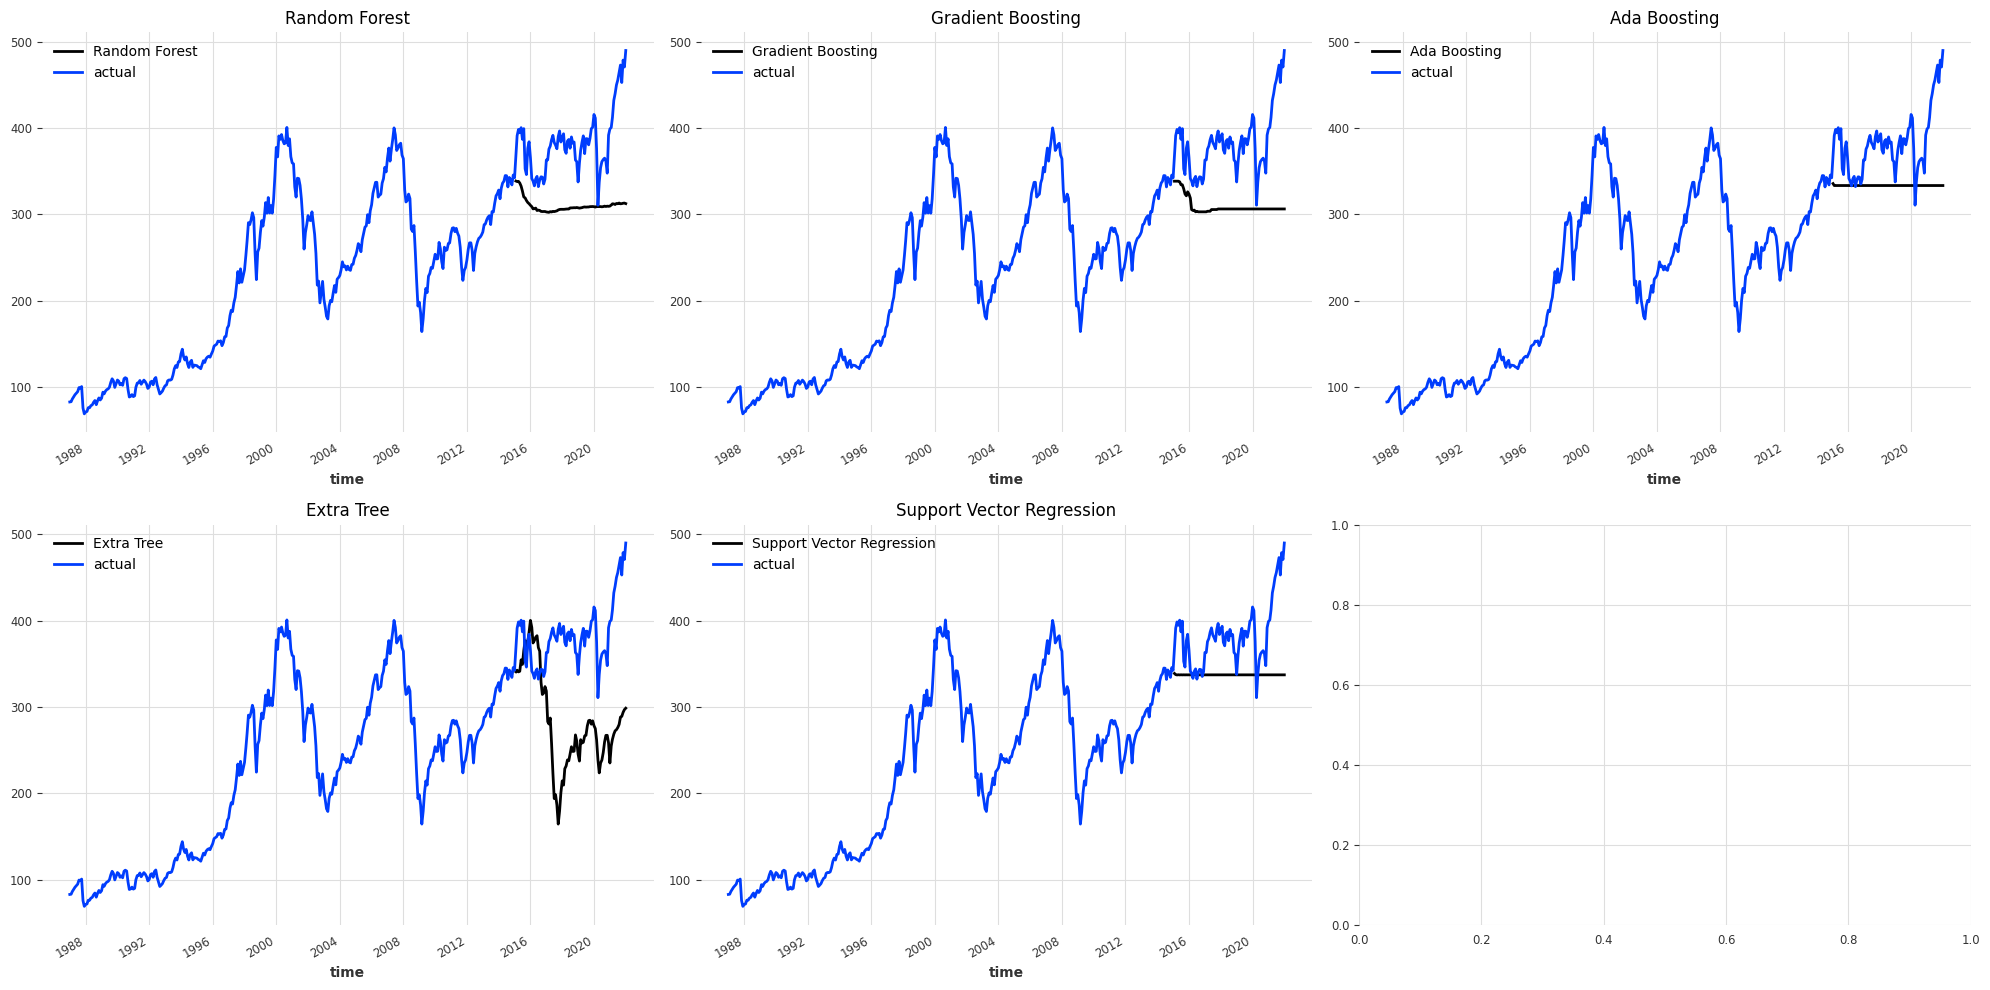

In [362]:
nonlinear_ML_forecasts = {'Random Forest': random_forest_forecast,
                          'Gradient Boosting': gb_boosting_forecast,
                          'Ada Boosting': ada_boosting_forecast,
                          'Extra Tree': extra_tree_forecast,
                          'Support Vector Regression': svr_forecast}

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax = ax.flatten()

for i, (name, forecast) in enumerate(nonlinear_ML_forecasts.items()):
    forecast.plot(label=name, ax=ax[i])
    ts_stoxx.plot(label='actual', ax=ax[i])
    ax[i].legend()
    ax[i].set_title(name)
    
plt.tight_layout();

### Combination ML models

- combination shrinkage
- combination dimensionality reduction
- combination nonlinear ML

In [363]:
from darts.models import RegressionEnsembleModel

In [364]:
# ensemble of regression models
shrinkage_ensemble = [LinearRegressionModel(lags=1, output_chunk_length=1),
                      RegressionModel(lags=1, output_chunk_length=1, model=sklearn.linear_model.Ridge(alpha=1)),
                       RegressionModel(lags=1, output_chunk_length=1, model=sklearn.linear_model.Lasso(alpha=1)),
                       RegressionModel(lags=1, output_chunk_length=1, model=sklearn.linear_model.ElasticNet(alpha=1)),
                       RegressionModel(lags=1, output_chunk_length=1, model=sklearn.linear_model.LassoLarsCV(cv=3))]

shrinkage_ensemble_model = RegressionEnsembleModel(forecasting_models=shrinkage_ensemble, regression_train_n_points=100)
shrinkage_ensemble_model.fit(train)
shrinkage_ensemble_forecast = shrinkage_ensemble_model.predict(len(test))

In [365]:
# ensemble of dimsenionality reduction models
dim_ensemble = [RegressionModel(lags=1, output_chunk_length=1, model=sklearn.cross_decomposition.PLSRegression(n_components=1)),
                RegressionModel(lags=1, output_chunk_length=1, model=sklearn.cross_decomposition.PLSCanonical(n_components=1)),
                RegressionModel(lags=1, output_chunk_length=1, model=sklearn.cross_decomposition.CCA(n_components=1))]

dim_ensemble_model = RegressionEnsembleModel(forecasting_models=dim_ensemble, regression_train_n_points=100)
dim_ensemble_model.fit(train)
dim_ensemble_forecast = dim_ensemble_model.predict(len(test))

In [366]:
# ensemble of nonlinear models
nonlinear_ensemble = [RandomForest(lags=100, output_chunk_length=1, n_estimators=100),
                        RegressionModel(lags=100, output_chunk_length=1, model=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)),
                        RegressionModel(lags=1, output_chunk_length=1, model=sklearn.ensemble.AdaBoostRegressor(n_estimators=1000000, random_state=0)),
                        RegressionModel(lags=1, output_chunk_length=1, model=sklearn.ensemble.ExtraTreesRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)),
                        RegressionModel(lags=1, output_chunk_length=1, model=sklearn.svm.SVR(kernel='rbf', C=1e3, gamma=0.1))]

nonlinear_ensemble_model = RegressionEnsembleModel(forecasting_models=nonlinear_ensemble, regression_train_n_points=100)
nonlinear_ensemble_model.fit(train)
nonlinear_ensemble_forecast = nonlinear_ensemble_model.predict(len(test))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


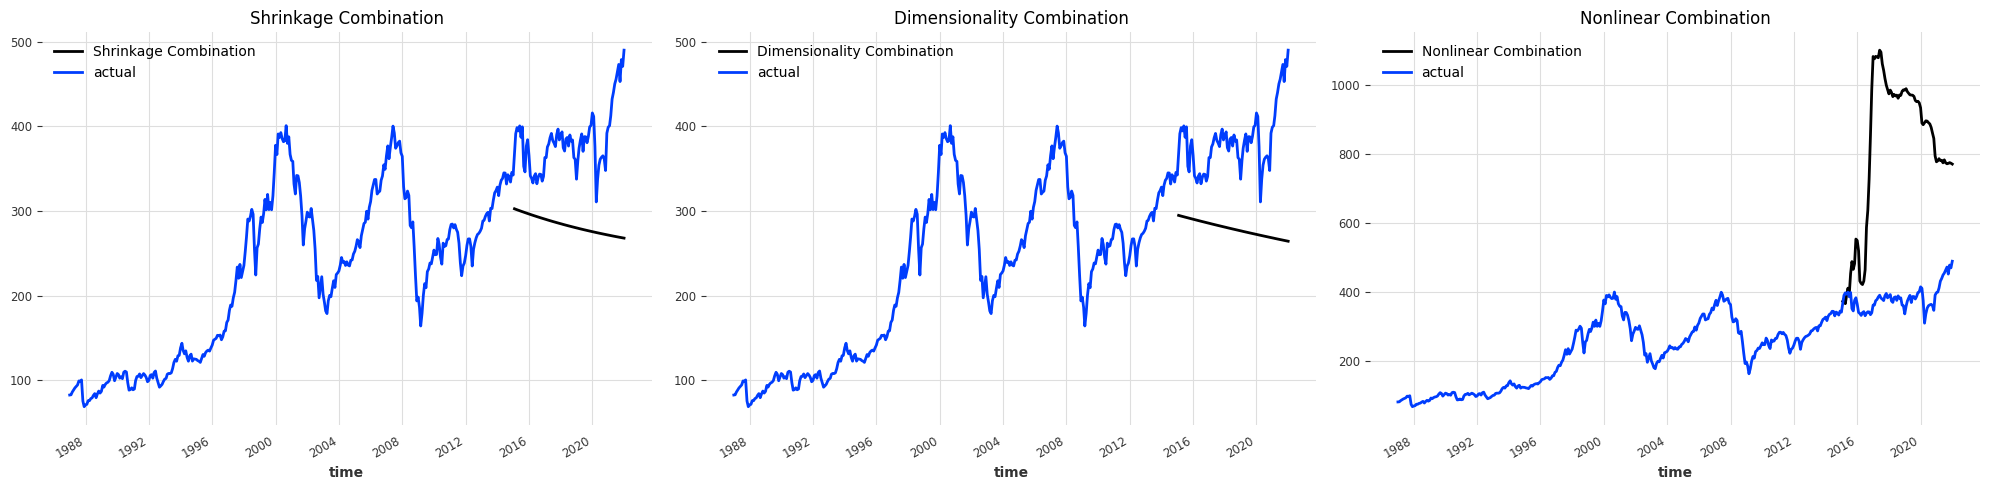

In [367]:
combination_forecasts = {'Shrinkage Combination': shrinkage_ensemble_forecast,
                         'Dimensionality Combination': dim_ensemble_forecast,
                         'Nonlinear Combination': nonlinear_ensemble_forecast}

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax = ax.flatten()

for i, (name, forecast) in enumerate(combination_forecasts.items()):
    forecast.plot(label=name, ax=ax[i])
    ts_stoxx.plot(label='actual', ax=ax[i])
    ax[i].legend()
    ax[i].set_title(name)
    
plt.tight_layout();